In [21]:
import torch
import pickle
import numpy as np
from dis import dis
from astyx_utils import *
import matplotlib.pyplot as plt
from PIL import Image

In [22]:
# with open('box.pickle', 'rb') as handle:
#     box = pickle.load(handle)
# box.shape

In [23]:
# center = box[:,0:3]
# center.shape
# zeros = np.zeros((center.shape[0], 3))
# center

In [24]:
# box_point = np.concatenate((center, zeros), axis=1)
# box_point.shape

In [25]:
# with open('0038.npy', 'rb') as handle:
#     lidar_pc = np.load(handle)
# lidar_pc = lidar_pc[lidar_pc[:, 0] > 0]

In [26]:
# print(np.mean(lidar_pc[:,0]))
# print(np.mean(lidar_pc[:,1]))
# print(np.mean(lidar_pc[:,2]))

In [39]:
# input: [Hor, height, depth]
single_point = np.array([[0, 0.5, 2]])
# (boxes_3D[:, [1, 2, 0]])
lidar_image = lidar2CameraOurs(single_point)
print(lidar_image)
lidar_image_1 = lidar_image
lidar_image_1 = lidar_image[:,[1,0]]

[[945.29571533 185.39425659]]


In [28]:
data = Astyx_Data()
img = data.get_camera("0038")
params = data.get_calibration_details()
proj = astyx_projection(params)
# lidar_image = proj.lidar2CameraAstyx(box_point[:,:3])
lidar_image = lidar2CameraOurs(lidar_pc).T


NameError: name 'lidar_pc' is not defined

In [ ]:
lidar_image = lidar_image.astype(int)
lidar_image = lidar_image_1
lidar_image

array([[461.73031616, 945.29571533]])

In [ ]:
# img.shape
# img[461, 1636, :] = 0

In [ ]:
lidar_image.shape

(1, 2)

In [ ]:
img.shape

(1080, 1920, 3)

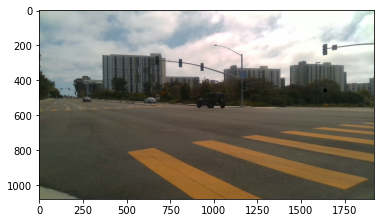

In [ ]:
img[450:470, 1630:1650, :] = 256
plt.imshow(img)


In [ ]:
# get empty canvas for img display
# img = np.zeros((img.shape[0], img.shape[1], 3))

radius = 10
for i in range(lidar_image.shape[0]):
        if lidar_image[i,1] < img.shape[0]-radius and lidar_image[i,0] < img.shape[1]-radius and lidar_image[i,1] >= radius and lidar_image[i,0] >= radius:
                    img[lidar_image[i,1]-radius : lidar_image[i,1]+radius+1,
                    lidar_image[i,0]-radius : lidar_image[i,0]+radius+1,
                    :] = 256
plt.imshow(img)
img.shape

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
with open('boxes_2D.pickle', 'rb') as handle:
    boxes_2D = pickle.load(handle)
boxes_2D

tensor([[ 601.7733,  499.3728,  672.7422,  535.5947],
        [ 249.6885,  494.4106,  298.2574,  526.0343],
        [ 904.0054,  472.4310, 1078.1804,  561.8030]])

In [ ]:
def inside_box(center, boxes):
    for i in range(boxes.shape[0]):
        box = boxes[i,:]
        if center[0] > max(box[0], box[1]):
            return False
        if center[0] < min(box[0], box[1]):
            return False
        if center[1] > max(box[2], box[3]):
            return False
        if center[1] < min(box[2], box[3]):
            return False
    return True

In [ ]:
# for i in range(lidar_image.shape[0]):
#     if inside_box(lidar_image[i,:], boxes_2D):
#         print("inside")
#     else:
#         print("outside")